In [1]:
import pandas as pd
import numpy as np
import config as cfg

In [3]:
#!pip install gspread
#from google.colab import auth
#auth.authenticate_user()

#import gspread
#from oauth2client.client import GoogleCredentials

#gc = gspread.authorize(GoogleCredentials.get_application_default())

In [ ]:
#wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/1Oe_e2TXBHmwduN1ndPL3iCXwLMO5mr9P3_W4ksQQxFs/edit#gid=0')

In [ ]:
#sheet = wb.worksheet('Sheet1')

In [ ]:
#data = sheet.get_all_values()

In [5]:
df = pd.read_csv('survey_results.csv')
#data = sheet.get_all_values()

#headers = data.pop(0)

#df = pd.DataFrame(data, columns=headers)
df.head()


,Partner,Area of Interest,Description,Does the dataset contain PII?,File Size,Operation,Software/ programming language?,Spatially enabled?,Geotag,CRS,...,Metadata standard,Metadata standard (Other),User,Use Cases,Specific SDI Requirements - Notes,Expected availability date,Extra infos,Timestamp,Name,Email
0,FMUL,Lisbon,Eye tracking/ gaze data,No,around 3 MB,W,Proprietary software that comes w/ hardware,No,NaN,NaN,...,NaN,ad-hoc,Phd and post docs,Data analysis,"storage/redundancy, access through VPN, securi...",1/1/2022,NaN,6/18/2021 11:54:14,Bruno Miranda,bruno.miranda@medicina.ulisboa.pt
1,FMUL,Lisbon,Clinical information,Yes,very small,W,spreadsheet,Yes,Postcode,NaN,...,NaN,NaN,researchers,Data analysis,"security, encryption, access control, redundancy",1/1/2022,NaN,6/18/2021 12:00:03,Bruno Miranda,bruno.miranda@medicina.ulisboa.pt
2,DTU,Copenhagen,Road network,No,few hundred MBs,R,python w/\nOverlassAPI,Yes,coordinates,WGS84/ Danish -> EPSG:25832,...,NaN,Custom,Modellers/ scientists,ABM model,format conversion; support visualization - CSV...,11/1/2021,NaN,6/18/2021 10:56:08,Carlos Azevedo,climaz@dtu.dk
3,IGOT,Lisbon,Twitter data,Yes,multiple files of 10 MB,R,Python,Yes,coordinates,WGS84,...,NaN,SNIG - INSPIRE,Researchers,"Sentiment analysis, emotions, mobility","data in different formats, interactive mapping...",9/1/2021,NaN,6/25/2021 11:42:50,Jorge Rocha,jorge.rocha@campus.ul.pt
4,IGOT,Metropolitan area of Lisbon,Modis/ Sentinel 5 - Air pollution,No,20 - 40 GB each file,R,Google earth engine - Python,Yes,Georeferenced,WGS84,...,NaN,INSPIRE,Researchers,Modelling air pollution,"For research/cross with other data - Python, R...",7/31/2021,NaN,6/25/2021 12:05:11,Jorge Rocha,jorge.rocha@campus.ul.pt


In [6]:
len(df)

58

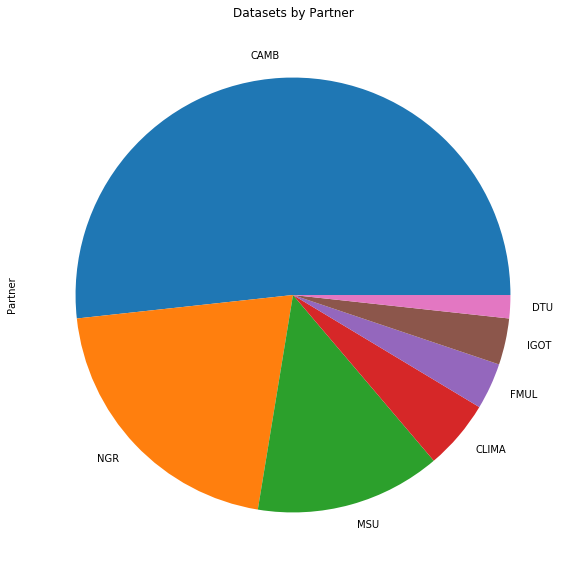

In [7]:
df.Partner.value_counts().plot(kind='pie', figsize=(20,10), title="Datasets by Partner")

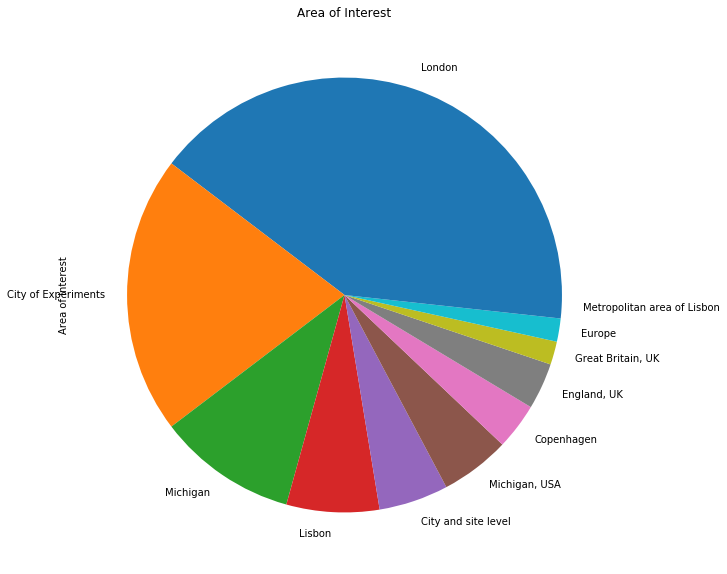

In [8]:
df['Area of Interest'].value_counts().plot(kind='pie', figsize=(20,10), title="Area of Interest")

In [9]:
! pip install opencage

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [10]:
from opencage.geocoder import OpenCageGeocode

In [ ]:
key = {cfg.OpenCage['key']}
#print(key)

In [ ]:
geocoder = OpenCageGeocode(key)

In [ ]:
countries = df['Area of Interest'].values.tolist()
countries

['Lisbon',
 'Lisbon',
 'Copenhagen',
 'Lisbon',
 'Metropolitan area of Lisbon',
 'Copenhagen',
 'Michigan',
 'Lisbon',
 'Michigan',
 'Michigan',
 'Michigan',
 'Michigan',
 'Michigan',
 'Michigan, USA',
 'Michigan, USA',
 'Michigan, USA',
 'London',
 'City and site level ',
 'London',
 'London',
 'London',
 'London',
 'London',
 'London',
 'London',
 'London',
 'London',
 'London',
 'London',
 'London',
 'London',
 'London',
 'London',
 'London',
 'London',
 'London',
 'London',
 'London',
 'London',
 'England, UK',
 'England, UK',
 'London',
 'Great Britain, UK',
 'Europe',
 'City and site level ',
 'City and site level ',
 'City of Experiments',
 'City of Experiments',
 'City of Experiments',
 'City of Experiments',
 'City of Experiments',
 'City of Experiments',
 'City of Experiments',
 'City of Experiments',
 'City of Experiments',
 'City of Experiments',
 'City of Experiments',
 'City of Experiments']

In [ ]:
latitudes = []
longitudes = []
for country in countries:
    result = geocoder.geocode(country, no_annotations="1")
    if result and len(result):
        #print(result[0]["components"]["country"], " ", result[0]["components"]["city"])
        longitude = result[0]["geometry"]["lng"]
        latitude = result[0]["geometry"]["lat"]
        print(longitude, latitude)
    else:
        print("no")
        longitude = np.nan
        latitude = np.nan
    latitudes.append(latitude)
    longitudes.append(longitude)

-9.1365919 38.7077507
-9.1365919 38.7077507
12.5700724 55.6867243
-9.1365919 38.7077507
-9.1599427 38.7456033
12.5700724 55.6867243
-84.6824346 43.6211955
-9.1365919 38.7077507
-84.6824346 43.6211955
-84.6824346 43.6211955
-84.6824346 43.6211955
-84.6824346 43.6211955
-84.6824346 43.6211955
-84.6824346 43.6211955
-84.6824346 43.6211955
-84.6824346 43.6211955
-0.1276474 51.5073219
no
-0.1276474 51.5073219
-0.1276474 51.5073219
-0.1276474 51.5073219
-0.1276474 51.5073219
-0.1276474 51.5073219
-0.1276474 51.5073219
-0.1276474 51.5073219
-0.1276474 51.5073219
-0.1276474 51.5073219
-0.1276474 51.5073219
-0.1276474 51.5073219
-0.1276474 51.5073219
-0.1276474 51.5073219
-0.1276474 51.5073219
-0.1276474 51.5073219
-0.1276474 51.5073219
-0.1276474 51.5073219
-0.1276474 51.5073219
-0.1276474 51.5073219
-0.1276474 51.5073219
-0.1276474 51.5073219
-1.2649062 52.5310214
-1.2649062 52.5310214
-0.1276474 51.5073219
-1.9180235 54.3153615
10.0 51.0
no
no
8.6808476 49.9316297
8.6808476 49.9316297
8.6808

In [ ]:
df2=df.copy(deep=True)
df2["latitudes"] = latitudes
df2["longitudes"] = longitudes
df2.dropna(subset=["latitudes"], inplace=True)
df2.dropna(subset=["longitudes"], inplace=True)

In [ ]:
df2.head()

,Partner,Area of Interest,Description,Does the dataset contain PII?,File Size,Operation,Software/ programming language?,Spatially enabled?,Geotag,CRS,Spatial resolution,Temporal resolution,Frequency of data,File format,File format (Other),Is it proprietary?,Are you going yo provide metadata?,Metadata standard,Metadata standard (Other),User,Use Cases,Specific SDI Requirements - Notes,Expected availability date,Extra infos,Timestamp,Name,Email,latitudes,longitudes
0,FMUL,Lisbon,Eye tracking/ gaze data,No,around 3 MB,W,Proprietary software that comes w/ hardware,No,,,,< 1 ms,1 experiment/ subject,CSV,"CSV, Plain text, XML, Matlab",Yes,Yes,,ad-hoc,Phd and post docs,Data analysis,"storage/redundancy, access through VPN, securi...",1/1/2022,,6/18/2021 11:54:14,Bruno Miranda,bruno.miranda@medicina.ulisboa.pt,38.707751,-9.136592
1,FMUL,Lisbon,Clinical information,Yes,very small,W,spreadsheet,Yes,Postcode,,Postcode,,,XML,spreadsheet,No,Yes,,,researchers,Data analysis,"security, encryption, access control, redundancy",1/1/2022,,6/18/2021 12:00:03,Bruno Miranda,bruno.miranda@medicina.ulisboa.pt,38.707751,-9.136592
2,DTU,Copenhagen,Road network,No,few hundred MBs,R,python w/\nOverlassAPI,Yes,coordinates,WGS84/ Danish -> EPSG:25832,1 meter / OSM,,Once,Multiple,"Shapefile, CSV",No,Yes,,Custom,Modellers/ scientists,ABM model,format conversion; support visualization - CSV...,11/1/2021,,6/18/2021 10:56:08,Carlos Azevedo,climaz@dtu.dk,55.686724,12.570072
3,IGOT,Lisbon,Twitter data,Yes,multiple files of 10 MB,R,Python,Yes,coordinates,WGS84,Coordinates,streaming,streaming,CSV,,No,Yes,,SNIG - INSPIRE,Researchers,"Sentiment analysis, emotions, mobility","data in different formats, interactive mapping...",9/1/2021,,6/25/2021 11:42:50,Jorge Rocha,jorge.rocha@campus.ul.pt,38.707751,-9.136592
4,IGOT,Metropolitan area of Lisbon,Modis/ Sentinel 5 - Air pollution,No,20 - 40 GB each file,R,Google earth engine - Python,Yes,Georeferenced,WGS84,250-2000 meters,Daily,"For now, one time, but we can collect multiple...",GeoTIFF,,No,Yes,,INSPIRE,Researchers,Modelling air pollution,"For research/cross with other data - Python, R...",7/31/2021,,6/25/2021 12:05:11,Jorge Rocha,jorge.rocha@campus.ul.pt,38.745603,-9.159943


In [ ]:
len(df2)

55

In [ ]:
#df.to_csv("output.csv")

In [ ]:
#! pip install folium

In [ ]:
import folium
import folium.plugins as plugins

folium_map = folium.Map(location=[0,0],zoom_start=2,tiles='Stamen Toner')
plugins.FastMarkerCluster(df2[['latitudes', 'longitudes']].values.tolist()).add_to(folium_map)

folium_map

In [ ]:
df.Description

0                               Eye tracking/ gaze data
1                                  Clinical information
2                                          Road network
3                                          Twitter data
4                     Modis/ Sentinel 5 - Air pollution
5                                Environmental exposure
6                                Environmental exposure
7                                Environmental exposure
8                            US Census tiger geometries
9                              US Census - tabular data
10                                        Sentiment Map
11                       Urban physical characteristics
12                                         Health data 
13    RAW DATASET - Magnetic resonance imaging of th...
14    Pseudonymized DATASET - Magnetic resonance ima...
15    Analysis of the Magnetic resonance imaging of ...
16                                        Child obesity
17                                    Social med

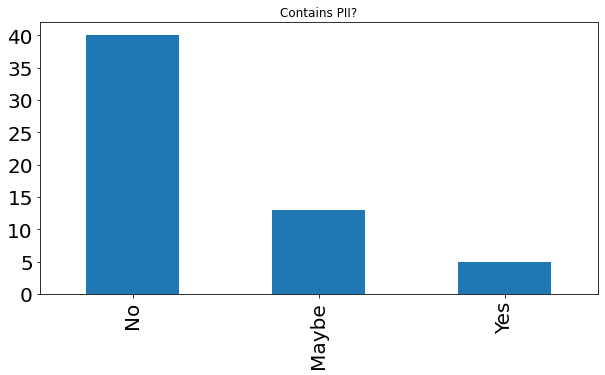

In [ ]:
df['Does the dataset contain PII?'].value_counts().plot(kind='bar', figsize=(10,5), fontsize=20, title="Contains PII?")

In [ ]:
df.value_counts(['Does the dataset contain PII?'])

Does the dataset contain PII?
No                               40
Maybe                            13
Yes                               5
dtype: int64

In [ ]:
len(df)

58

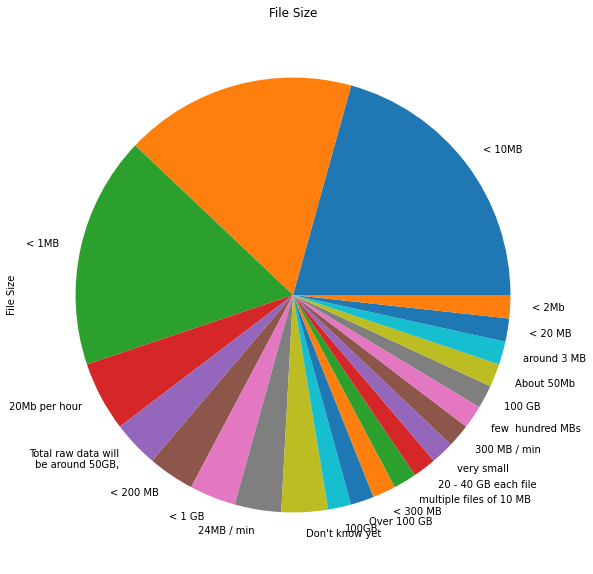

In [ ]:
df["File Size"].value_counts().plot(kind='pie', figsize=(20,10), title="File Size")

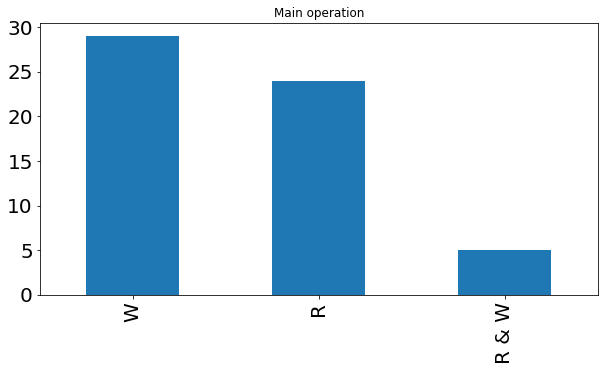

In [ ]:
df['Operation'].value_counts().plot(kind='bar', figsize=(10,5), fontsize=20, title="Main operation")

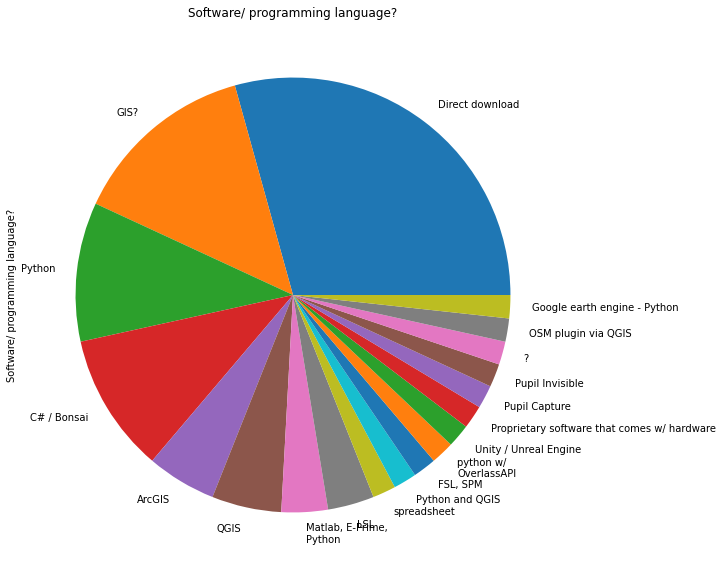

In [ ]:
df['Software/ programming language?'].value_counts().plot(kind='pie', figsize=(20,10), title="Software/ programming language?")

In [ ]:
df.value_counts(['Is it proprietary?'])

Is it proprietary?
No                    45
Yes                   13
dtype: int64

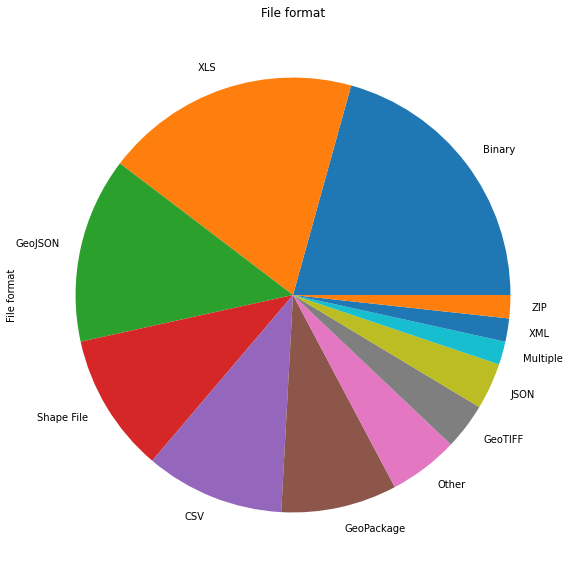

In [ ]:
df['File format'].value_counts().plot(kind='pie', figsize=(20,10), title="File format")

In [ ]:
df.value_counts(['File format'])

File format
Binary         12
XLS            11
GeoJSON         8
Shape File      6
CSV             6
GeoPackage      5
Other           3
JSON            2
GeoTIFF         2
ZIP             1
XML             1
Multiple        1
dtype: int64

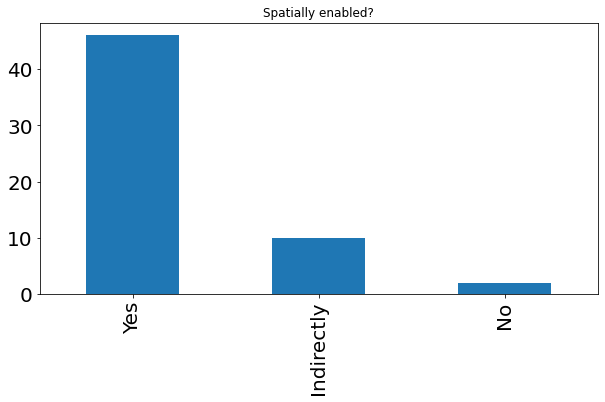

In [ ]:
df['Spatially enabled?'].value_counts().plot(kind='bar', figsize=(10,5), fontsize=20, title="Spatially enabled?")

In [ ]:
df.value_counts(['Spatially enabled?'])

Spatially enabled?
Yes                   46
Indirectly            10
No                     2
dtype: int64

In [ ]:
df.value_counts(['CRS'])

CRS                        
WGS84                          24
                               17
OSGB 1936                       2
Usually WGS84                   2
WGS86                           1
GeoJSON                         1
WGS84/ Danish -> EPSG:25832     1
WGS85                           1
WGS95                           1
WGS94                           1
WGS88                           1
WGS89                           1
WGS90                           1
WGS91                           1
WGS92                           1
WGS93                           1
WGS87                           1
dtype: int64

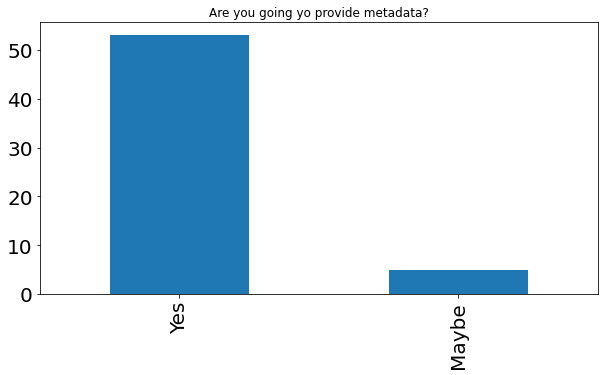

In [ ]:
df['Are you going yo provide metadata?'].value_counts().plot(kind='bar', figsize=(10,5), fontsize=20, title="Are you going yo provide metadata?")

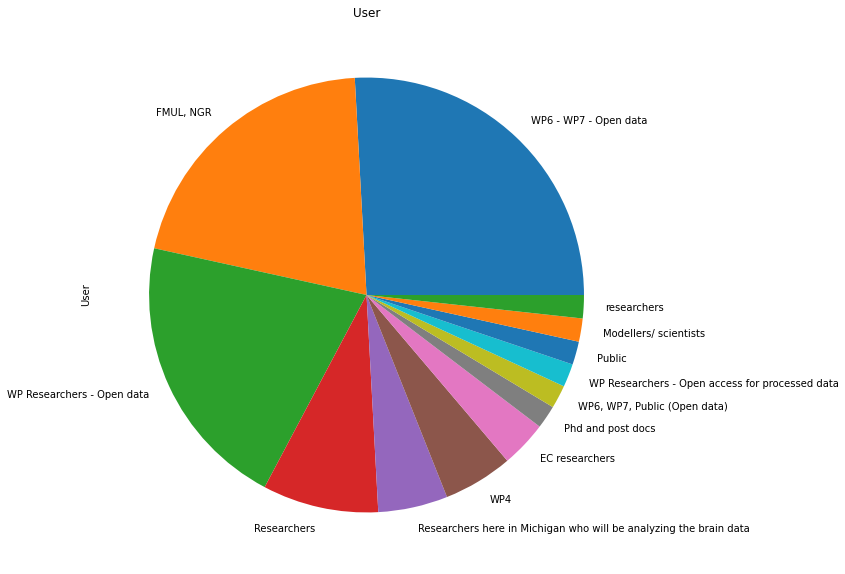

In [ ]:
df['User'].value_counts().plot(kind='pie', figsize=(20,10), title="User")

In [ ]:
df.value_counts(["Use Cases"])

Use Cases                                                                       
GIS analysis,\n interactive mapping                                                 18
WP5                                                                                 12
Data analysis                                                                        6
Associations between brain and behaviours \nof people. Out of sandbox prediction     3
GIS analysis                                                                         3
Spatial data analysis                                                                2
Sentiment analysis, spatial clustering                                               2
Geocoding, data refining                                                             1
Data analysis - link w/ non spatial census data                                      1
GIS analysis,\n interactive mapping\n                                                1
Modelling air pollution                          

In [ ]:
df.value_counts(['Specific SDI Requirements - Notes'])

Specific SDI Requirements - Notes                                                                         
Link to the original dataset                                                                                  18
                                                                                                              12
Define an interface between Climateflux server and SDI - Sharing data with other EC partners                   3
Share data, in a secure environment                                                                            3
Link to the original dataset, access the SDI from QGIS                                                         3
Integrate with a widget showing statistical summary,  create interactive mapping, access the SDI from QGIS     3
Access via SQL                                                                                                 2
To store with:\n- Pupil Video (x2)\n- World Video\n- Pupil Tracking Data                              

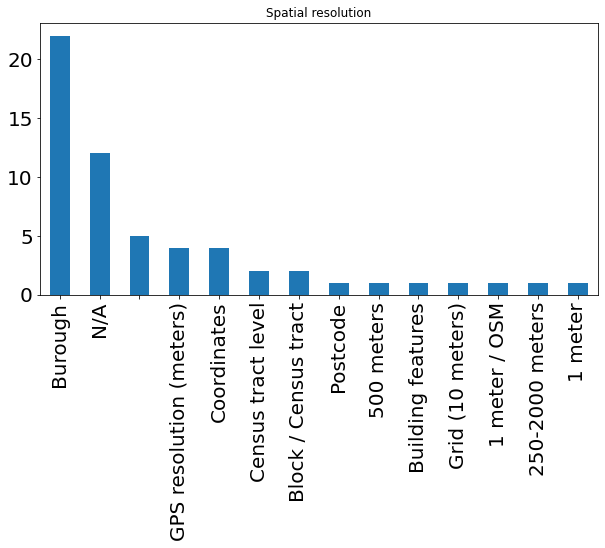

In [ ]:
df['Spatial resolution'].value_counts().plot(kind='bar', figsize=(10,5), fontsize=20, title="Spatial resolution")